In [3]:
rm(list=ls())
graphics.off()

require('tidyverse')
require('data.table')
require('rTPC')
require('car')
require('grDevices')
require('Cairo')
require('ggplot2')
require('ggpubr')
require('patchwork')
require('cowplot')
require('ggtext')

In [6]:
# Relationship between r_m opt and latitude

alphaLat <- as_tibble(read_csv('../data/TraitData.csv')) %>% 
            select(interactor1, standardisedtraitname,latitude) %>%
            filter(standardisedtraitname == '1/alpha' & latitude != 'NA') %>%
            rename(species = interactor1) %>%
            distinct(species, latitude) %>%
            mutate(Latcurve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Macrocentrus iridescens' ~ '26',
                              species == 'Otiorhynchus sulcatus' ~ '27',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Gastrolina depressa' ~ '29',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Amblyseius swirskii' ~ '33',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Leptinotarsa decemlineata' ~ '42',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45')) %>%
  arrange(Latcurve_ID) %>% rename(latspecies = species)
            
# alphaLat %>% print(n=60)

head(alphaLat)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  originaltraitvalue = col_double(),
  originalerrorpos = col_double(),
  originalerrorneg = col_double(),
  standardisedtraitvalue = col_double(),
  latitude = col_double(),
  longitude = col_double()
)
ℹ Use `spec()` for the full column specifications.




latspecies,latitude,Latcurve_ID
<chr>,<dbl>,<chr>
Aedes albopictus,46.07488,1
Bemisia tabaci,-6.80000,10
Tetraneura nigriabdominalis,24.15000,11
Stethorus punctillum,46.79110,12
Tetranychus mcdanieli,46.79110,13
Tetranychus urticae,35.70969,14


In [10]:
alphaMass <- as_tibble(read_csv('../data/a_pksT_pksMass.csv'))


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  a_pk = col_double(),
  a_pkLwr = col_double(),
  a_pkUpr = col_double(),
  species = col_character(),
  curve_ID = col_double(),
  T_pk = col_double(),
  T_pkLwr = col_double(),
  T_pkUpr = col_double(),
  mass = col_double()
)




In [11]:
alphaMass <- as_tibble(read_csv('../data/a_pksT_pksMass.csv')) %>% 
  # select(species, a_pk, mass) %>% 
  mutate(curve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                                 species == 'Aedes aegypti' ~ '2',
                                 species == 'Anthonomus grandis' ~ '3',
                                 species == 'Paracoccus marginatus' ~ '4',
                                 species == 'Acyrthosiphon pisum' ~ '5',
                                 species == 'Aphis gossypii' ~ '6',
                                 species == 'Harmonia axyridis' ~ '7',
                                 species == 'Tribolium castaneum' ~ '8',
                                 species == 'Aedes krombeini' ~ '9',
                                 species == 'Bemisia tabaci' ~ '10',
                                 species == 'Tetraneura nigriabdominalis' ~ '11',
                                 species == 'Stethorus punctillum' ~ '12',
                                 species == 'Tetranychus mcdanieli' ~ '13',
                                 species == 'Tetranychus urticae' ~ '14',
                                 species == 'Clavigralla tomentosicollis' ~ '15',
                                 species == 'Planococcus citri' ~ '16',
                                 species == 'Muscidifurax zaraptor' ~ '17',
                                 species == 'Aphis nasturtii' ~ '18',
                                 species == 'Rhopalosiphum maidis' ~ '19',
                                 species == 'Anopheles gambiae' ~ '20',
                                 species == 'Anoplophora glabripennis' ~ '21',
                                 species == 'Amblyseius womersleyi' ~ '22',
                                 species == 'Trichogramma sp. nr. Lutea' ~ '23',
                                 species == 'Trichogramma bruni' ~ '24',
                                 species == 'Culex annulirostris' ~ '25',
                                 species == 'Macrocentrus iridescens' ~ '26',
                                 species == 'Otiorhynchus sulcatus' ~ '27',
                                 species == 'Drosophila suzukii' ~ '28',
                                 species == 'Gastrolina depressa' ~ '29',
                                 species == 'Laricobius nigrinus' ~ '30',
                                 species == 'Aubeonymus mariaefranciscae' ~ '31',
                                 species == 'Iphiseius degenerans' ~ '32',
                                 species == 'Amblyseius swirskii' ~ '33',
                                 species == 'Tetranychus evansi' ~ '36',
                                 species == 'Helicoverpa armigera' ~ '37',
                                 species == 'Antestiopsis thunbergii' ~ '38',
                                 species == 'Monochamus leuconotus' ~ '39',
                                 species == 'Kampimodromus aberrans' ~ '40',
                                 species == 'Phenacoccus solenopsis' ~ '41',
                                 species == 'Leptinotarsa decemlineata' ~ '42',
                                 species == 'Halyomorpha halys' ~ '43',
                                 species == 'Muscidifurax raptorellus' ~ '44',
                                 species == 'Thrips hawaiiensis' ~ '45')) %>%
  arrange(curve_ID) %>% filter(curve_ID != 'NA')

head(alphaMass)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  a_pk = col_double(),
  a_pkLwr = col_double(),
  a_pkUpr = col_double(),
  species = col_character(),
  curve_ID = col_double(),
  T_pk = col_double(),
  T_pkLwr = col_double(),
  T_pkUpr = col_double(),
  mass = col_double()
)




a_pk,a_pkLwr,a_pkUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.13092688,0.11460454,0.18426343,Aedes albopictus,1,31.160,29.38399,33.52370,2.202857
0.08282502,0.07929311,0.09506491,Bemisia tabaci,10,29.751,29.33872,30.66100,0.293125
0.11794938,0.11689323,0.11881231,Tetraneura nigriabdominalis,11,30.648,30.50557,30.75143,0.867300
0.15281755,0.14286845,0.16616810,Stethorus punctillum,12,32.875,32.77005,33.01580,0.480000
0.35107259,0.31695625,0.39202056,Tetranychus mcdanieli,13,35.182,34.93494,35.79288,0.024300
0.16981269,0.14186659,0.19217598,Tetranychus urticae,14,31.467,29.40700,32.73653,0.024300


In [24]:
alphaLat_data <- bind_cols(alphaMass,alphaLat) %>% 
                 select(-latspecies, -Latcurve_ID) %>% 
                 mutate(a_pkmassCor = a_pk/mass^-0.265)

head(alphaLat_data)

a_pk,a_pkLwr,a_pkUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,latitude,a_pkmassCor
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.13092688,0.11460454,0.18426343,Aedes albopictus,1,31.160,29.38399,33.52370,2.202857,46.07488,0.16140619
0.08282502,0.07929311,0.09506491,Bemisia tabaci,10,29.751,29.33872,30.66100,0.293125,-6.80000,0.05983159
0.11794938,0.11689323,0.11881231,Tetraneura nigriabdominalis,11,30.648,30.50557,30.75143,0.867300,24.15000,0.11358226
0.15281755,0.14286845,0.16616810,Stethorus punctillum,12,32.875,32.77005,33.01580,0.480000,46.79110,0.12580624
0.35107259,0.31695625,0.39202056,Tetranychus mcdanieli,13,35.182,34.93494,35.79288,0.024300,46.79110,0.13109393
0.16981269,0.14186659,0.19217598,Tetranychus urticae,14,31.467,29.40700,32.73653,0.024300,35.70969,0.06340972


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = log(a_pkmassCor) ~ latitude, data = alphaLat_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99079 -0.40298  0.06589  0.55769  1.17999 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.098174   0.193302 -10.854 1.25e-13 ***
latitude    -0.005919   0.005545  -1.067    0.292    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7666 on 41 degrees of freedom
Multiple R-squared:  0.02704,	Adjusted R-squared:  0.00331 
F-statistic: 1.139 on 1 and 41 DF,  p-value: 0.292


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
latitude,1,0.6696907,0.6696907,1.139493,0.2920048
Residuals,41,24.0960828,0.5877093,NA,NA


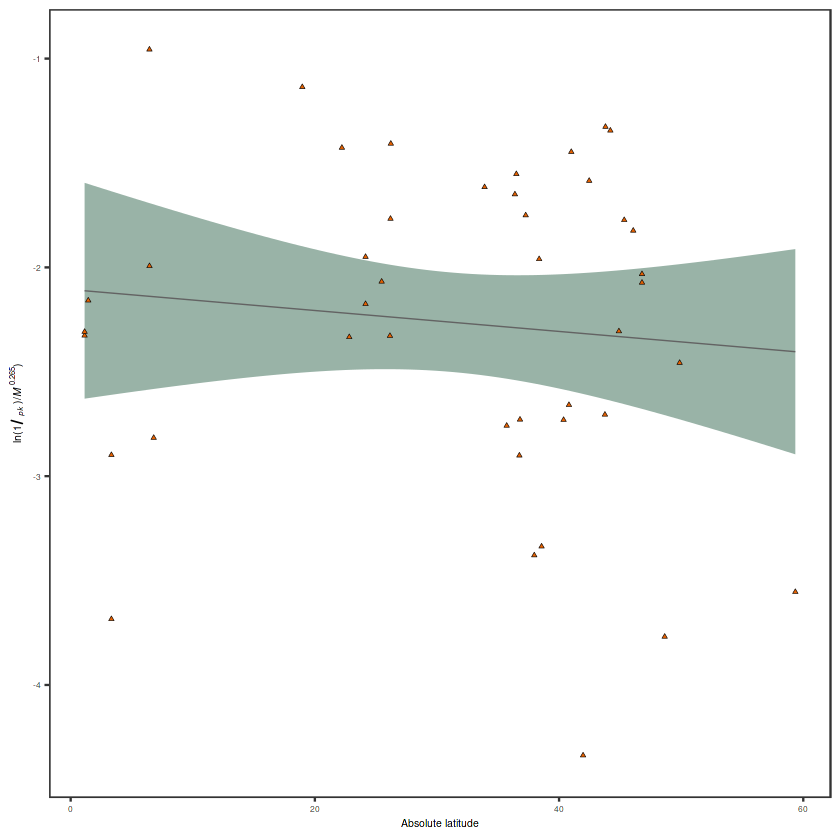

In [36]:
a_pklat_plot <-
  alphaLat_data %>%
  ggplot(aes(x= abs(latitude), y = log(a_pkmassCor)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="#004225")+
  scale_y_continuous(expression(plain(paste("ln(", italic(1/alpha[pk])~")/",
                                            italic(M^-0.265),")"))),
                     limits=c(-4.5,-0.8),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_point(size = 1,stroke=0.2, col = '#000000', shape=24, fill ='#e66101')+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=6),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.01, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

a_pklat_plot

save_plot(a_pklat_plot, file="../results/alphaLat.pdf", 
         base_height=3,base_width = 4, base_asp = 0.75,units="cm")

a_pklatmodel <- lm(log(a_pkmassCor) ~ latitude, data = alphaLat_data)
summary(a_pklatmodel)
anova(a_pklatmodel)

`geom_smooth()` using formula 'y ~ x'



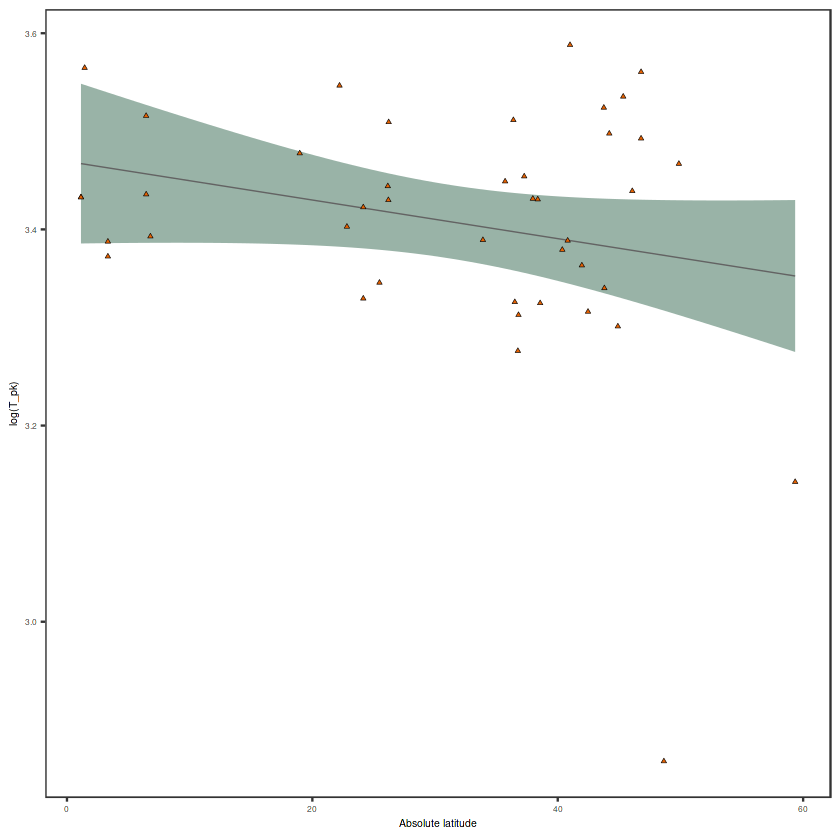

In [29]:
a_T_pklat_plot <-
  alphaLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="#004225")+
  # scale_y_continuous(expression(plain(paste("ln(", italic(1/alpha[pk])~")/",
  #                                           italic(M^-0.265),")"))),
  #                    limits=c(-4.5,-0.8),
  #                    expand = c(0.01, 0),
  #                    breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_point(size = 1,stroke=0.2, col = '#000000', shape=24, fill ='#e66101')+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=6),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.01, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

a_T_pklat_plot

save_plot(a_T_pklat_plot, file="../results/alpha_Tpk_Lat.pdf", 
         base_height=3,base_width = 4, base_asp = 0.75,units="cm")


a_T_pklatmodel <- lm( T_pk ~ latitude, data = alphaLat_data)
summary(a_T_pklatmodel)
anova(a_T_pklatmodel)